# Original Trump Tweet Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/deveshmaheshwari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/deveshmaheshwari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
original_df_2016 = pd.read_csv('Trump_2016.csv')
original_df_2018 = pd.read_csv('Trump_2018.csv')

In [3]:
assert original_df_2016.columns.all() == original_df_2018.columns.all() 
print('Columns are the same')
print('2016 dataset shape:', original_df_2016.shape)
print('2018 dataset shape:', original_df_2018.shape)
print('2016 dataset columns:', original_df_2016.columns)
print('2018 dataset columns:', original_df_2018.columns)

Columns are the same
2016 dataset shape: (3649, 7)
2018 dataset shape: (3556, 7)
2016 dataset columns: Index(['source', 'text', 'created_at', 'retweet_count', 'favorite_count',
       'is_retweet', 'id_str'],
      dtype='object')
2018 dataset columns: Index(['source', 'text', 'created_at', 'retweet_count', 'favorite_count',
       'is_retweet', 'id_str'],
      dtype='object')


## EDA 2016 Dataset 


In [4]:
print(original_df_2016.info())
print('*'*100)
print(original_df_2016.describe())
print('*'*100)
print(original_df_2016.isnull().sum())
print('*'*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   source          3649 non-null   object 
 1   text            3649 non-null   object 
 2   created_at      3648 non-null   object 
 3   retweet_count   3648 non-null   float64
 4   favorite_count  3648 non-null   float64
 5   is_retweet      3648 non-null   object 
 6   id_str          3648 non-null   float64
dtypes: float64(3), object(4)
memory usage: 199.7+ KB
None
****************************************************************************************************
       retweet_count  favorite_count        id_str
count    3648.000000     3648.000000  3.648000e+03
mean     8234.224507    22661.954770  7.441187e+17
std     10423.880893    27375.048677  3.712391e+16
min         0.000000        0.000000  6.830000e+17
25%      3501.250000     9328.500000  7.090000e+17
50%      5956.500000   

In [5]:
original_df_2016[original_df_2016['is_retweet'].isna()]

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
3023,Twitter Ads,This is a crossroads in the history of our civ...,NaN,NaN,NaN,NaN,NaN


In [6]:
## As there os only one row with missing value in 2016, we can drop it later
## Now EDA 
print(original_df_2016['is_retweet'].value_counts())

is_retweet
False    3461
True      187
Name: count, dtype: int64


In [7]:
original_df_2016['source'].value_counts()


source
Twitter for iPhone     1950
Twitter for Android    1275
Twitter Web Client      333
Twitter Ads              63
Twitter for iPad         22
Instagram                 2
TweetDeck                 2
Media Studio              1
Periscope                 1
Name: count, dtype: int64

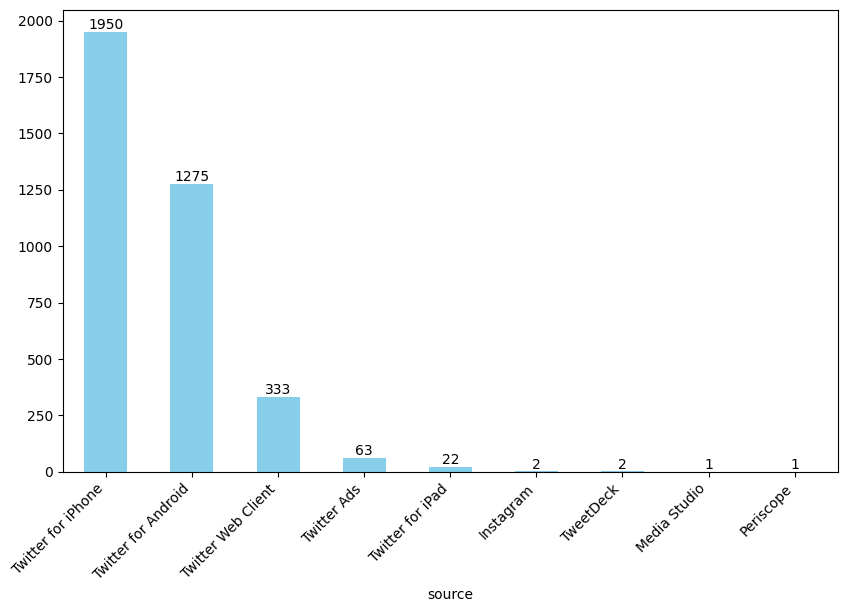

In [8]:
counts = original_df_2016['source'].value_counts()
ax = counts.plot(kind='bar', color='skyblue', figsize=(10, 6))
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45, ha='right')
plt.show()


#### Now from Above EDA we can see that there is a clear imbalance in the dataset. So it will be better to apply Bagging Algorithms like Random Forrest over other classification algorithms like Boosting Algoirthm or Logistic Regrression. But we can try other algorithms and check the accuracy for each 

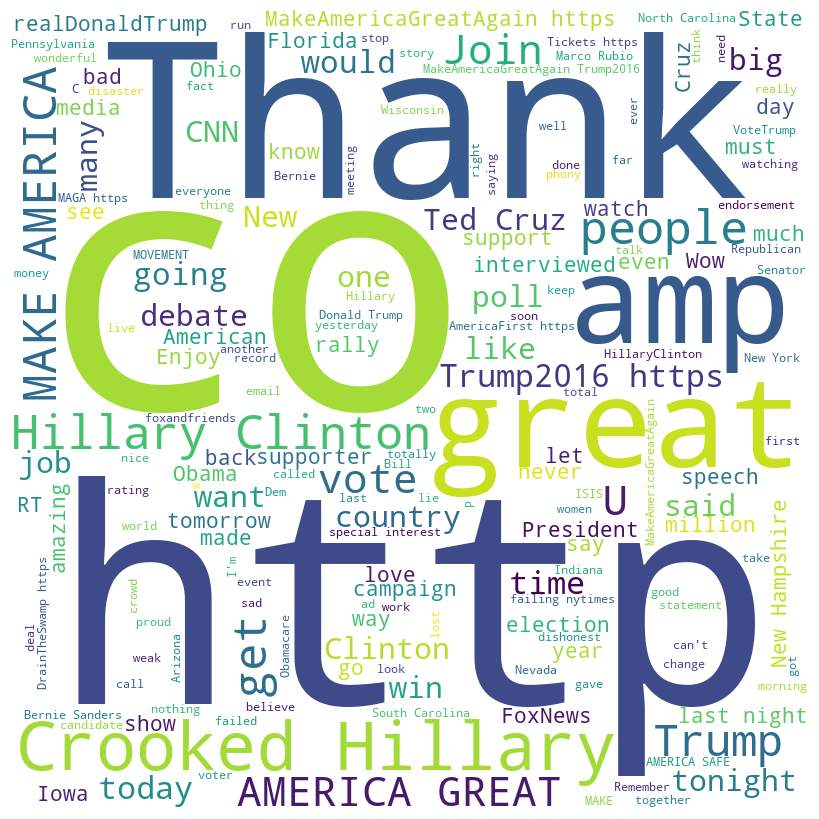

In [9]:
# Word Cloud for 2016
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(original_df_2016['text']))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [10]:
## Data Preprocessing and creating stopwords list from word cloud
stopwords= nltk.corpus.stopwords.words('english')
custom_stopwords = ['http','https','amp;','co','RT','thank','amp','great']

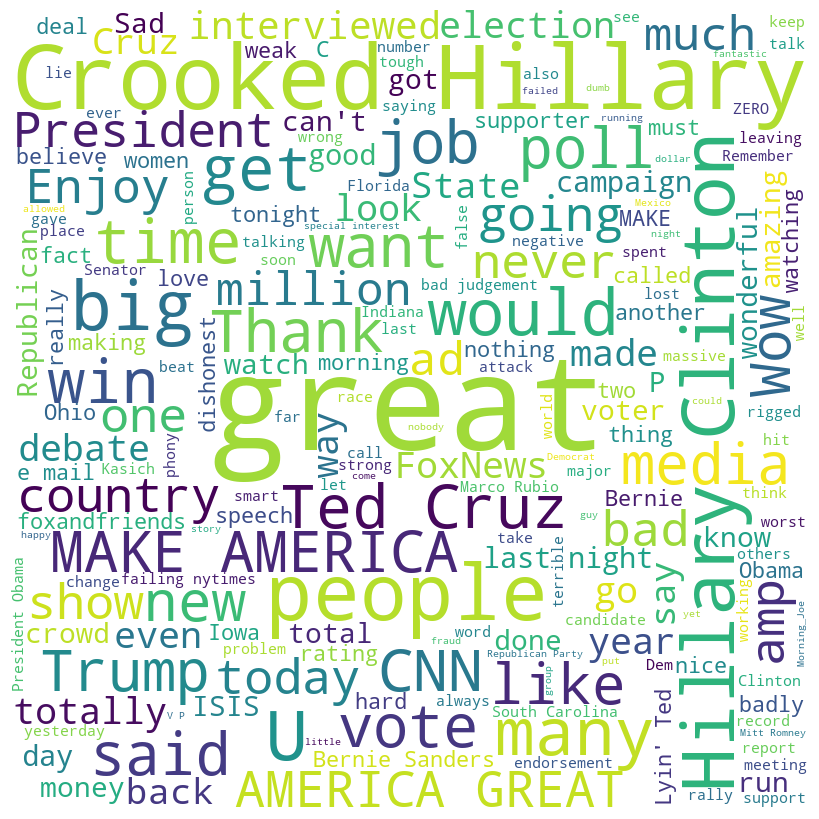

In [11]:
# Word Cloud for 2016 for trump tweets

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(" ".join(original_df_2016[original_df_2016['source']=='Twitter for Android']['text']))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

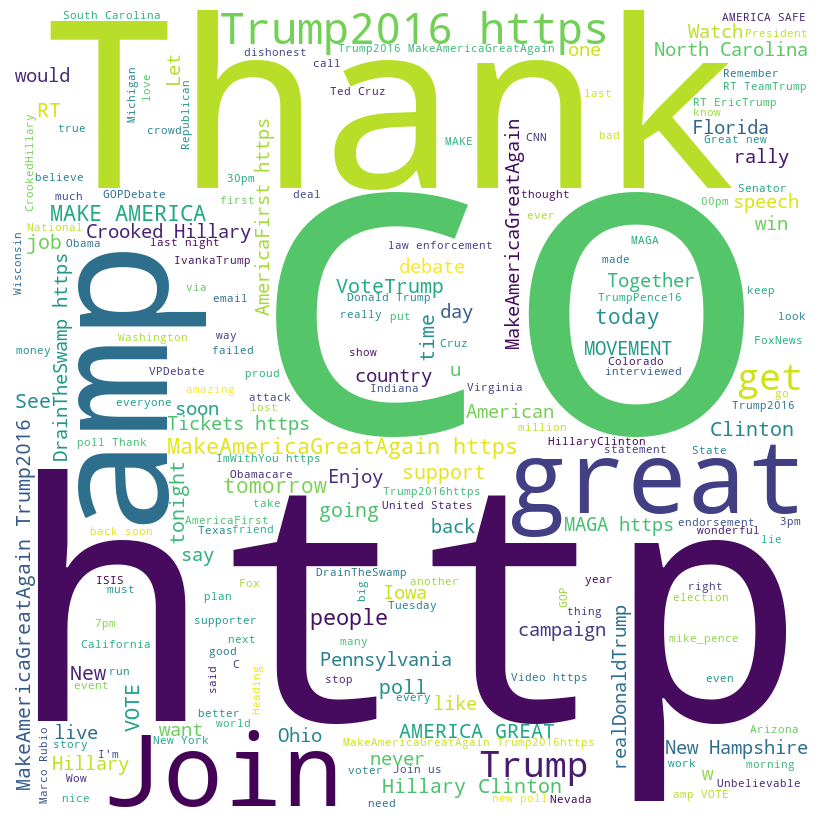

In [12]:
# word cloud for 2016 for staff tweets
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(" ".join(original_df_2016[original_df_2016['source']=='Twitter for iPhone']['text']))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [13]:
## Word Frequency analysis 
from collections import Counter
trump_tweet_words=" ".join(original_df_2016[original_df_2016['source']=='Twitter for Android']['text']).split()
staff_tweet_words=" ".join(original_df_2016[original_df_2016['source']=='Twitter for iPhone']['text']).split()
trump_tweet_freq=Counter(trump_tweet_words)
staff_tweet_freq=Counter(staff_tweet_words)
trump_tweet_freq_df=pd.DataFrame(trump_tweet_freq.items(), columns=['word', 'freq'])
staff_tweet_freq_df=pd.DataFrame(staff_tweet_freq.items(), columns=['word', 'freq'])
freq_df=trump_tweet_freq_df.merge(staff_tweet_freq_df, on='word', suffixes=('_trump', '_staff'),how='outer').fillna(0)
freq_df['total_freq']=freq_df['freq_trump']+freq_df['freq_staff']
threshold=freq_df['total_freq'].quantile(0.95)
common_words=freq_df[freq_df['total_freq']>threshold]['word'].values
freq_df['freq_diff']=abs(freq_df['freq_trump']-freq_df['freq_staff'])
diff_threshold=freq_df['freq_diff'].quantile(0.25)
minimal_diff_words=freq_df[freq_df['freq_diff']<diff_threshold]['word'].values


In [14]:
def get_top_ngrams(texts, n=2, top_k=10):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    X = vectorizer.fit_transform(texts)
    ngram_counts = X.toarray().sum(axis=0)
    ngram_freq = pd.DataFrame(ngram_counts, index=vectorizer.get_feature_names_out(), columns=['frequency'])
    return ngram_freq.sort_values('frequency', ascending=False).head(top_k)

## Bigram and Trigram for trump tweets
print('Top 10 bigrams for Trump tweets',get_top_ngrams(original_df_2016[original_df_2016['source']=='Twitter for Android']['text'], n=2, top_k=10))
print("*"*100)
print('Top 10 tri-grams for Trump tweets',get_top_ngrams(original_df_2016[original_df_2016['source']=='Twitter for Android']['text'], n=3, top_k=10))

Top 10 bigrams for Trump tweets                  frequency
will be                174
crooked hillary        152
of the                 117
hillary clinton        101
in the                  72
ted cruz                70
thank you               58
make america            57
great again             56
america great           55
****************************************************************************************************
Top 10 tri-grams for Trump tweets                          frequency
crooked hillary clinton         59
america great again             55
make america great              55
will be interviewed             39
be interviewed on               33
all of the                      25
the failing nytimes             20
lyin ted cruz                   19
thank you to                    18
the people of                   17


In [15]:
## Bigrams and trigrams for staff tweets
print('Top 10 bigrams for Staff tweets',get_top_ngrams(original_df_2016[original_df_2016['source']=='Twitter for iPhone']['text'], n=2, top_k=10))
print("*"*100)
print('Top 10 tri-grams for Staff tweets',get_top_ngrams(original_df_2016[original_df_2016['source']=='Twitter for iPhone']['text'], n=3, top_k=10))

Top 10 bigrams for Staff tweets                              frequency
https co                          1558
thank you                          510
trump2016 https                    135
will be                            116
join me                            115
makeamericagreatagain https         83
make america                        80
great again                         66
of the                              65
we will                             63
****************************************************************************************************
Top 10 tri-grams for Staff tweets                                        frequency
trump2016 https co                           134
makeamericagreatagain https co                80
join me in                                    56
america great again                           51
make america great                            51
thank you for                                 50
makeamericagreatagain trump2016 https         47
maga https c

In [16]:
print(original_df_2018.info())
print('*'*100)
print(original_df_2018.describe())
print('*'*100)
print(original_df_2018.isnull().sum())
print('*'*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3556 entries, 0 to 3555
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   source          3556 non-null   object 
 1   text            3556 non-null   object 
 2   created_at      3555 non-null   object 
 3   retweet_count   3555 non-null   float64
 4   favorite_count  3555 non-null   float64
 5   is_retweet      3497 non-null   object 
 6   id_str          3555 non-null   float64
dtypes: float64(3), object(4)
memory usage: 194.6+ KB
None
****************************************************************************************************
       retweet_count  favorite_count        id_str
count    3555.000000     3555.000000  3.555000e+03
mean    20202.011533    76613.532489  1.020785e+18
std     10793.627826    46153.242717  3.537265e+16
min         6.000000        0.000000  9.480000e+17
25%     13410.500000    53422.500000  9.960000e+17
50%     18580.000000   

In [17]:
original_df_2018[original_df_2018['is_retweet'].isnull()].shape

(59, 7)

1. There are more null values compared to the 2016 dataset, lets remove that row
2. For filling the null values in the "is_retweet" column, lets pick most common value for that column

In [18]:
original_df_2018['is_retweet'].value_counts()

is_retweet
False    3033
True      464
Name: count, dtype: int64

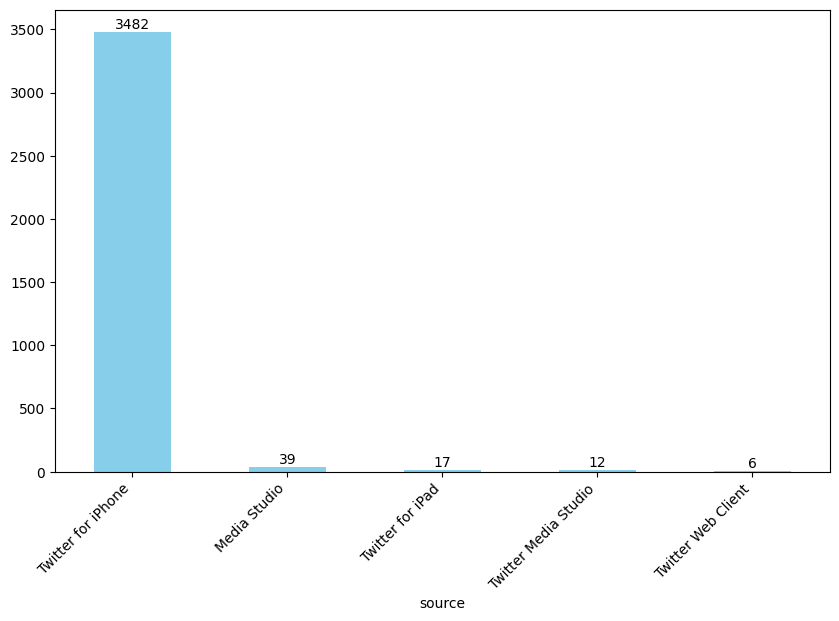

In [19]:
counts = original_df_2018['source'].value_counts()
ax = counts.plot(kind='bar', color='skyblue', figsize=(10, 6))
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45, ha='right')
plt.show()

## Handling Missing Value

In [20]:
df_2016 = original_df_2016.copy()
df_2016 = df_2016[~df_2016['is_retweet'].isnull()] ## removing the row that has multilple null values
print(f'Size of Dataset = {len(df_2016)}')

Size of Dataset = 3648


In [21]:
df_2018 = original_df_2018.copy()
df_2018 = df_2018[~df_2018['id_str'].isnull()] ## removing the row that has multilple null values and checked it in the original dataset when checked the shape of is_retweet df (59,7)
print(f'Size of Dataset = {len(df_2018)}')

Size of Dataset = 3555


## Feature Engineering
1. To build features based on the textual data, we have to consider that there are a lot of links present in the text data, if we plan to choose any of the textutal representations of the text like tf-idf, countvectorizer, Word Embeddings, etc so better to remove them and as i am removing these links i am taking num_links as new feature to account the importance of the links


In [22]:
http_re = re.compile(r'(https:\/\/[a-z./0-9]*)')
custom_final_stopwords = set(stopwords).union(set(custom_stopwords))


def get_num_links(text):
    text = text.lower()
    return len(http_re.findall(text))

def preprocess_text(text):
    text = text.lower()
    text = re.sub('&amp;', '&' , text)
    text = http_re.sub('',text)
    text = re.sub(' +', ' ', text).strip()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in custom_final_stopwords ] #and set(word).isdisjoint(set('!"$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'))
    # tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)
df_2016['num_links'] = df_2016['text'].apply(lambda x : get_num_links(x))
df_2016['cleaned_text'] = df_2016['text'].apply(lambda x : preprocess_text(x))

df_2018['num_links'] = df_2018['text'].apply(lambda x : get_num_links(x))
df_2018['cleaned_text'] = df_2018['text'].apply(lambda x : preprocess_text(x))


In [23]:
# Function to extract Word2Vec features
def word2vec_features(texts, model, size=100):
    features = []
    for text in texts:
        words = simple_preprocess(text)
        word_vecs = [model.wv[word] for word in words if word in model.wv]
        if word_vecs:
            features.append(np.mean(word_vecs, axis=0))
        else:
            features.append(np.zeros(size))
    return np.array(features)

In [24]:
df_2016_test= df_2016[~df_2016['source'].isin(['Twitter for Android', 'Twitter for iPhone'])] ## test set kept aside from 2016 dataset
df_2016_train = df_2016[df_2016['source'].isin(['Twitter for Android', 'Twitter for iPhone'])] ## data to be used for training and validation
df_2016_train['label'] = df_2016_train['source'].apply(lambda x : 1 if x == 'Twitter for Android' else 0) ## label creation for training data
df_2016_test.head(5)
df_2016_train=df_2016_train.drop(columns=['text','created_at','source','id_str'])

# Train Word2Vec model
model = Word2Vec([simple_preprocess(text) for text in df_2016_train['cleaned_text']], vector_size=100, window=5, min_count=1, workers=4)
word2vec_features_array = word2vec_features(df_2016_train['cleaned_text'], model,size=100)
word2vec_df = pd.DataFrame(word2vec_features_array, index=df_2016_train.index, columns=[f'w2v_{i}' for i in range(100)])
df_2016_train_combined = pd.concat([df_2016_train.reset_index(drop=True), word2vec_df.reset_index(drop=True)], axis=1)
df_2016_train_combined.columns = df_2016_train_combined.columns.astype(str)

/var/folders/cb/sxm6s0td0mdfwqt18mgqm25c0000gn/T/ipykernel_29068/676299800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016_train['label'] = df_2016_train['source'].apply(lambda x : 1 if x == 'Twitter for Android' else 0) ## label creation for training data


In [25]:
df_2016_train_combined

,retweet_count,favorite_count,is_retweet,num_links,cleaned_text,label,w2v_0,w2v_1,w2v_2,w2v_3,...,w2v_90,w2v_91,w2v_92,w2v_93,w2v_94,w2v_95,w2v_96,w2v_97,w2v_98,w2v_99
0,2108.0,6735.0,False,0,@ foxnews live members family 11:50 p.m. ring ...,1,-0.030522,0.058081,0.024448,-0.016890,...,0.111423,0.014617,-0.004162,0.024910,0.123008,0.084673,0.045025,-0.083840,0.021489,-0.014663
1,3460.0,8581.0,False,2,happy new year & !,0,-0.035533,0.062782,0.024614,-0.014611,...,0.122686,0.018327,-0.006213,0.019952,0.135494,0.091633,0.058089,-0.090879,0.026286,-0.012134
2,3434.0,9143.0,False,1,# happynewyearamerica !,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1948.0,8258.0,False,1,happy new year # maralago ! family support .,0,-0.027057,0.052391,0.019599,-0.010585,...,0.097127,0.013694,-0.003638,0.019569,0.109154,0.073853,0.043894,-0.073316,0.018869,-0.013560
4,2642.0,8495.0,False,0,well year officially begun . many stops planne...,1,-0.027911,0.050312,0.013052,-0.013417,...,0.088584,0.009832,-0.000447,0.017604,0.098002,0.068493,0.036638,-0.068686,0.017937,-0.010742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3220,34542.0,117710.0,False,0,anymore . beginning end horrible iran deal ( u...,1,-0.013593,0.022842,0.006416,-0.007483,...,0.042197,0.006826,-0.002916,0.011708,0.051044,0.036687,0.018783,-0.034233,0.011130,-0.002426
3221,13919.0,51857.0,False,1,'economists say trump delivered hope ',0,-0.032635,0.052070,0.018733,-0.011947,...,0.095420,0.007439,-0.000487,0.018660,0.109838,0.072480,0.040720,-0.067914,0.013601,-0.005449
3222,11330.0,45609.0,False,1,administration follow two simple rules :,0,-0.009062,0.023019,0.005402,-0.004993,...,0.038945,0.009711,0.001850,0.004797,0.051168,0.036451,0.019183,-0.027840,0.003627,-0.001840
3223,34415.0,97669.0,False,0,move delay ( v. putin ) - always knew smart !,1,-0.009983,0.023486,0.005113,-0.008999,...,0.040868,0.007400,-0.001231,0.013080,0.044540,0.029346,0.019067,-0.030731,0.009731,-0.007075


In [26]:


# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('ngram', CountVectorizer(ngram_range=(2, 3), max_features=20), 'cleaned_text'),  # N-gram features
        ('tfidf', TfidfVectorizer(), 'cleaned_text'),  # TF-IDF features
        ('num', StandardScaler(), ['num_links', 'retweet_count', 'favorite_count']),  # Standardizing numerical features
        ('bool', OneHotEncoder(drop='if_binary'), ['is_retweet']),  # Encoding boolean features
    ],
    remainder='passthrough'  # Ensures Word2Vec features are not dropped
)

# Define classifiers to compare
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'Support Vector Machine': SVC(kernel='linear', probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'XGBoost': XGBClassifier(eta=0.05,
                                   gamma=0.2,
                                   subsample=1.0,
                                   reg_lambda=0.4,
                                   reg_alpha=0.6,
                                   n_estimators=200,
                                   min_child_weight=7,
                                   max_depth=9,
                                   colsample_bytree=0.9)
}

# Prepare the combined feature matrix and target vector
features = df_2016_train_combined.drop(columns=['label'])
target = df_2016_train_combined['label'].values

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, stratify=target, random_state=42) ## stratify for equal distribution in train and validation set

# Iterate over classifiers, train and evaluate each
best_classifier = None
best_pipeline = None
best_accuracy = 0
for name, classifier in classifiers.items():
    print(f"Training with {name}...")
    
    # Create a new pipeline for each classifier
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict and evaluate on the validation set
    y_pred = pipeline.predict(X_val)
    print(f"Classification Report for {name}:")
    print(classification_report(y_val, y_pred))
    
    # Calculate accuracy
    accuracy = (y_pred == y_val).mean()
    print(f"Accuracy for {name}: {accuracy:.4f}\n")
    
    # Track the best classifier
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classifier = name
        best_pipeline = pipeline

# Output the best classifier
print(f"Best classifier: {best_classifier} with accuracy {best_accuracy:.4f}")

# Display top n-grams used as features (example with CountVectorizer)
ngram_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['ngram'].get_feature_names_out()
print("Top n-grams used as features:")
print(ngram_feature_names)


Training with Logistic Regression...
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.81      0.88       390
           1       0.77      0.97      0.86       255

    accuracy                           0.87       645
   macro avg       0.87      0.89      0.87       645
weighted avg       0.90      0.87      0.87       645

Accuracy for Logistic Regression: 0.8729

Training with Random Forest...
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       390
           1       0.79      0.76      0.78       255

    accuracy                           0.83       645
   macro avg       0.82      0.82      0.82       645
weighted avg       0.83      0.83      0.83       645

Accuracy for Random Forest: 0.8279

Training with Support Vector Machine...
Classification Report for Support Vector Machine:
              precisio

## Results Indicates that Support Vector Machine is the best classifier with accuracy of 0.88

Accuracy: 0.8558139534883721
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.80      0.87       382
           1       0.76      0.94      0.84       263

    accuracy                           0.86       645
   macro avg       0.86      0.87      0.85       645
weighted avg       0.87      0.86      0.86       645



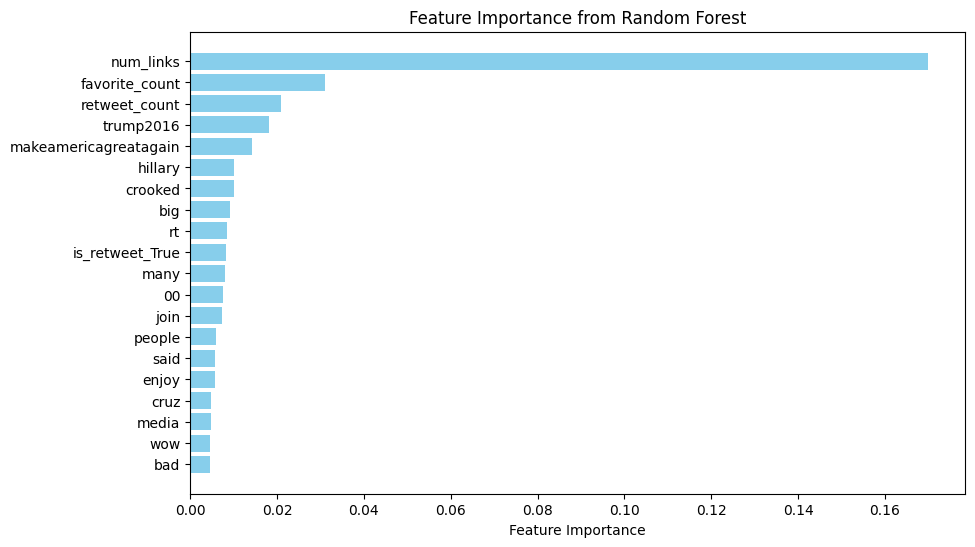

In [27]:
## Basic Code to check the feature importance of num_links used in the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200)  
preprocessor_test = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(), 'cleaned_text'),
        ('num', StandardScaler(), ['num_links', 'retweet_count', 'favorite_count']), ## to standardize the numerical columns
        ('bool', OneHotEncoder(drop='if_binary'), ['is_retweet']),
    ])
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_test),
    ('classifier', rf),
])
X_train, X_test, y_train, y_test = train_test_split(df_2016_train.drop(columns=['label']), df_2016_train['label'], test_size=0.2, random_state=42)
rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
tfidf_feature_names = preprocessor_test.named_transformers_['tfidf'].get_feature_names_out()
numerical_feature_names = ['num_links', 'retweet_count', 'favorite_count']
boolean_feature_names = preprocessor_test.named_transformers_['bool'].get_feature_names_out()
all_feature_names = list(tfidf_feature_names) + numerical_feature_names + list(boolean_feature_names)
feature_importances = rf.feature_importances_
importances_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

importances_df = importances_df.sort_values(by='Importance', ascending=False)[0:20]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

### This Picutre shows the top 20 features that are important in the model and also our assumption that num_links is important is correct

## Since the best model came out to be SVM, lets use that as our trained model and test it out on the other datasets

> We have two datasets to test on -
> 1. df_2016_test
> 2. df_2018

In [28]:
best_pipeline

/opt/anaconda3/envs/springenv/lib/python3.9/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ngram',
                                                  CountVectorizer(max_features=20,
                                                                  ngram_range=(2,
                                                                               3)),
                                                  'cleaned_text'),
                                                 ('tfidf', TfidfVectorizer(),
                                                  'cleaned_text'),
                                                 ('num', StandardScaler(),
                                                  ['num_links', 'retweet_count',
                                                   'favorite_count']),
                                                 ('bool',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['is_retweet'])])),
                ('classifier',
                 SVC(kernel='linear', probability=True, random_state=42))])

In [51]:
# df_2016_test=df_2016_test.drop(columns=['text','created_at','source','id_str'])
# Train Word2Vec model
model = Word2Vec([simple_preprocess(text) for text in df_2016_test['cleaned_text']], vector_size=100, window=5, min_count=1, workers=4)
word2vec_features_array = word2vec_features(df_2016_test['cleaned_text'], model,size=100)
word2vec_df = pd.DataFrame(word2vec_features_array, index=df_2016_test.index, columns=[f'w2v_{i}' for i in range(100)])
df_2016_test_combined = pd.concat([df_2016_test.reset_index(drop=True), word2vec_df.reset_index(drop=True)], axis=1)
df_2016_test_combined.columns = df_2016_test_combined.columns.astype(str)

# df_2018=df_2018.drop(columns=['text','created_at','source','id_str'])
# Train Word2Vec model
model = Word2Vec([simple_preprocess(text) for text in df_2018['cleaned_text']], vector_size=100, window=5, min_count=1, workers=4)
word2vec_features_array = word2vec_features(df_2018['cleaned_text'], model,size=100)
word2vec_df = pd.DataFrame(word2vec_features_array, index=df_2018.index, columns=[f'w2v_{i}' for i in range(100)])
df_2018_combined = pd.concat([df_2018.reset_index(drop=True), word2vec_df.reset_index(drop=True)], axis=1)
df_2018_combined=df_2018_combined.fillna(0)
df_2018_combined.columns = df_2018_combined.columns.astype(str)



In [64]:
df_2016_test_combined['Prediction'] = best_pipeline.predict(df_2016_test_combined)
df_2016_test_combined['Prediction'] = df_2016_test_combined['Prediction'].apply(lambda x : "Trump" if x == 1 else "Staff")

df_2018_combined['Prediction'] = best_pipeline.predict(df_2018_combined)
df_2018_combined['Prediction'] = df_2018_combined['Prediction'].apply(lambda x : "Trump" if x == 1 else "Staff")

In [63]:
df_2016_test_combined.head()

,retweet_count,favorite_count,is_retweet,num_links,cleaned_text,w2v_0,w2v_1,w2v_2,w2v_3,w2v_4,...,w2v_92,w2v_93,w2v_94,w2v_95,w2v_96,w2v_97,w2v_98,w2v_99,model_out,Prediction
0,2209.0,6957.0,False,0,look forward lowell massachusetts today . hear...,0.003367,-0.002072,-0.000023,-0.000549,0.001232,...,0.001557,-0.001014,0.000076,0.002250,-0.003650,0.000747,-0.001681,0.000523,Trump,Trump
1,4202.0,8757.0,False,0,woody johnson owner nyjets @ jebbush ’ finance...,-0.002386,-0.003415,0.000946,-0.001785,-0.002477,...,-0.000181,-0.001059,0.002193,0.001133,0.000316,-0.000515,0.001605,-0.005100,Staff,Staff
2,1192.0,3594.0,False,0,wow @ unionleader circulation nh dropped 75000...,-0.002858,-0.001171,-0.000708,0.003482,0.000483,...,-0.001675,0.001756,0.000031,0.000543,-0.001868,-0.002811,0.001391,-0.001983,Trump,Trump
3,3045.0,6349.0,False,0,’ know @ samuelljackson best knowledge n't pla...,-0.002663,0.001389,-0.001980,-0.000733,-0.000262,...,0.000180,0.000552,0.000157,0.001554,0.004257,0.002041,0.001803,-0.005742,Trump,Trump
4,2341.0,5261.0,False,0,’ cheat golf @ samuelljackson cheats—with game...,-0.000993,-0.000709,-0.002379,-0.003629,0.001928,...,0.001018,0.000457,0.001014,0.000697,0.002360,-0.000361,0.002340,0.000763,Staff,Staff


We can see the Classifier output in the "Prediction" column

## Analysis of Dataset

In [65]:
df_2016_train_combined['Dataset'] = '2016_Labelled_dataset'
df_2016_test_combined['Dataset'] = '2016_UnLabelled_dataset'
df_2018_combined['Dataset'] = '2018_UnLabelled_dataset'

df = pd.concat([df_2016_train_combined, df_2016_test_combined, df_2018_combined])[['cleaned_text', 'num_links', 'retweet_count', 'favorite_count', 'is_retweet', 'Dataset']]

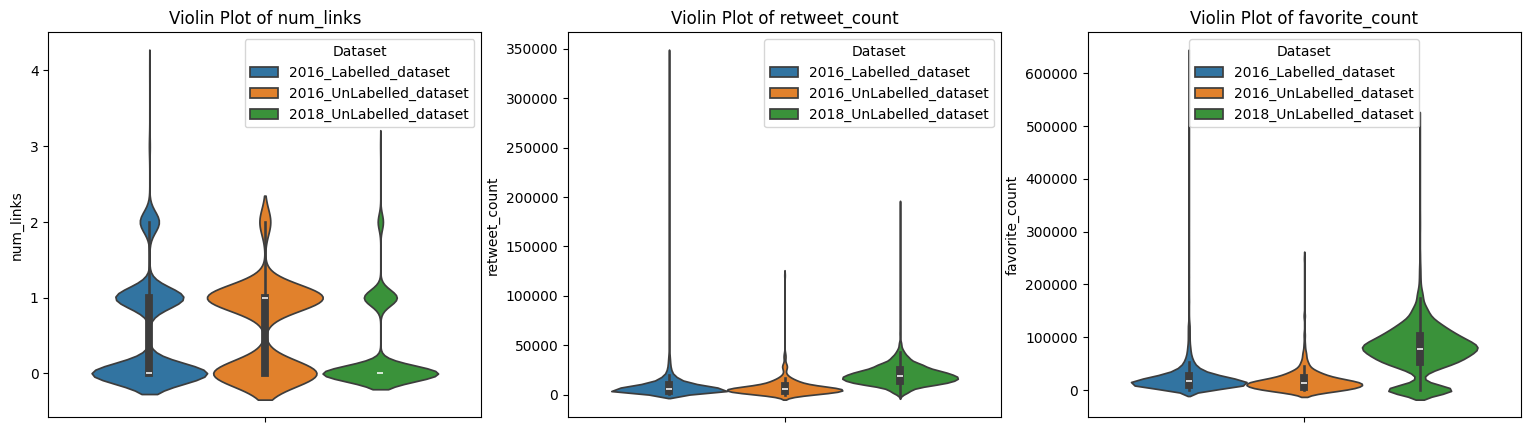

In [77]:
fig = plt.figure(figsize=(19, 17))
attr = ['num_links', 'retweet_count', 'favorite_count']
for idx in range(0, len(attr)):
    fig.add_subplot(3, 3, idx+1)
    sns.violinplot(hue='Dataset', y=attr[idx], data=df)
    plt.title(f'Violin Plot of {attr[idx]}')
plt.show()

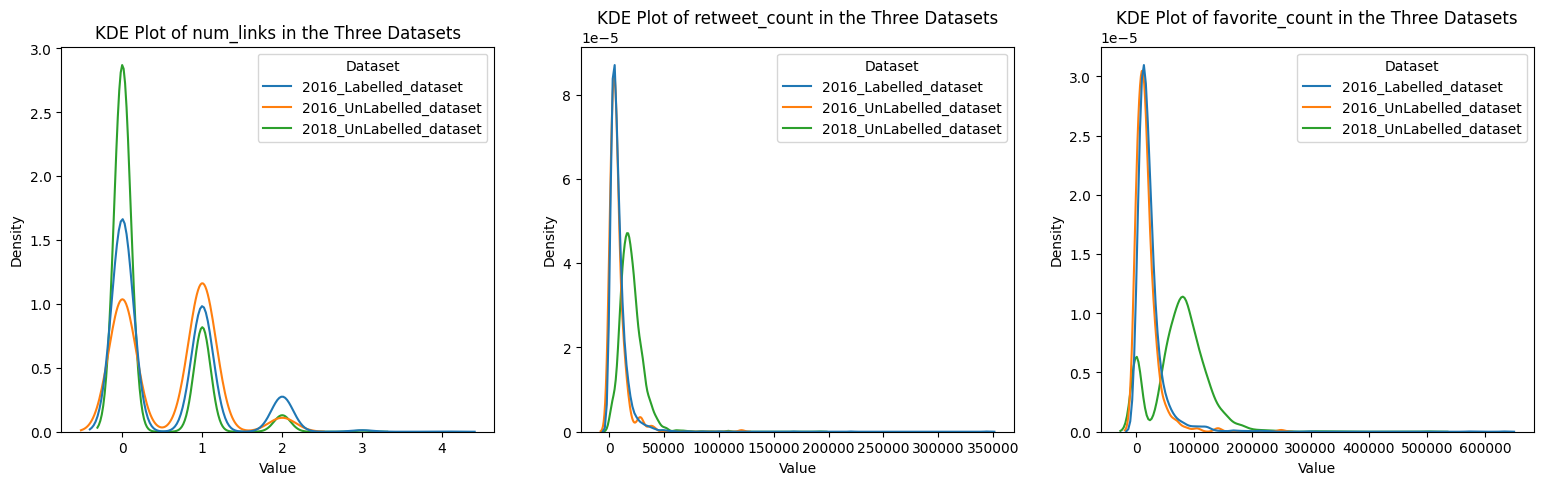

In [78]:
fig = plt.figure(figsize=(19, 17))
attr = ['num_links', 'retweet_count', 'favorite_count']
for idx in range(0, len(attr)):
    fig.add_subplot(3, 3, idx+1)
    sns.kdeplot(data=df, x=attr[idx], hue='Dataset', palette='tab10', common_norm=False)
    plt.title(f'KDE Plot of {attr[idx]} in the Three Datasets')
    plt.xlabel('Value')
    plt.ylabel('Density')
plt.show()

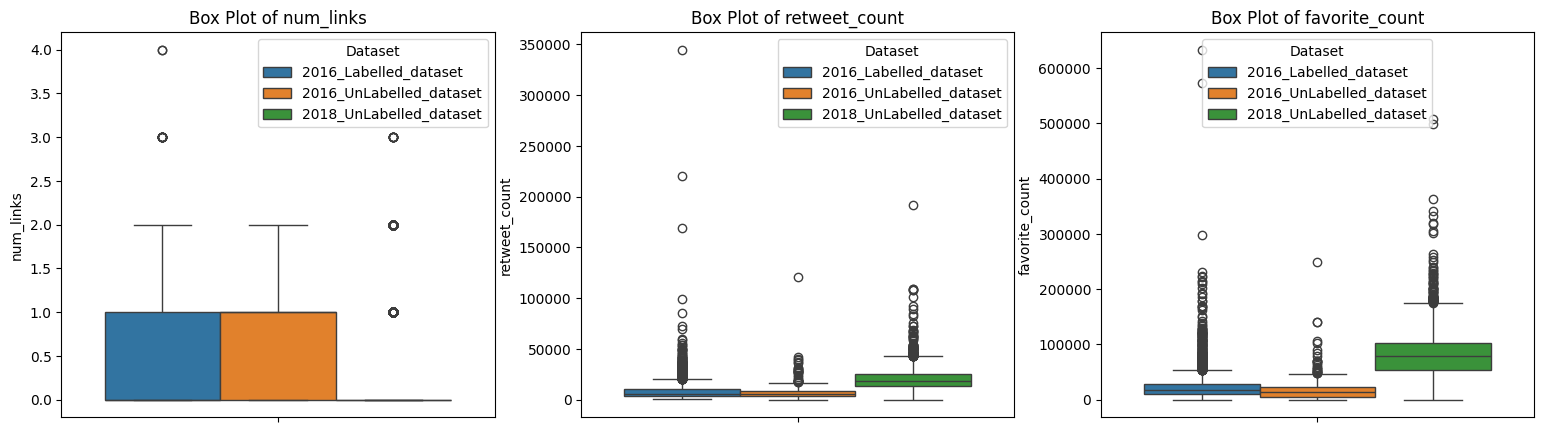

In [79]:
fig = plt.figure(figsize=(19, 17))
attr = ['num_links', 'retweet_count', 'favorite_count']
for idx in range(0, len(attr)):
    fig.add_subplot(3, 3, idx+1)
    sns.boxplot(hue='Dataset', y=attr[idx], data=df)
    plt.title(f'Box Plot of {attr[idx]}')
plt.show()

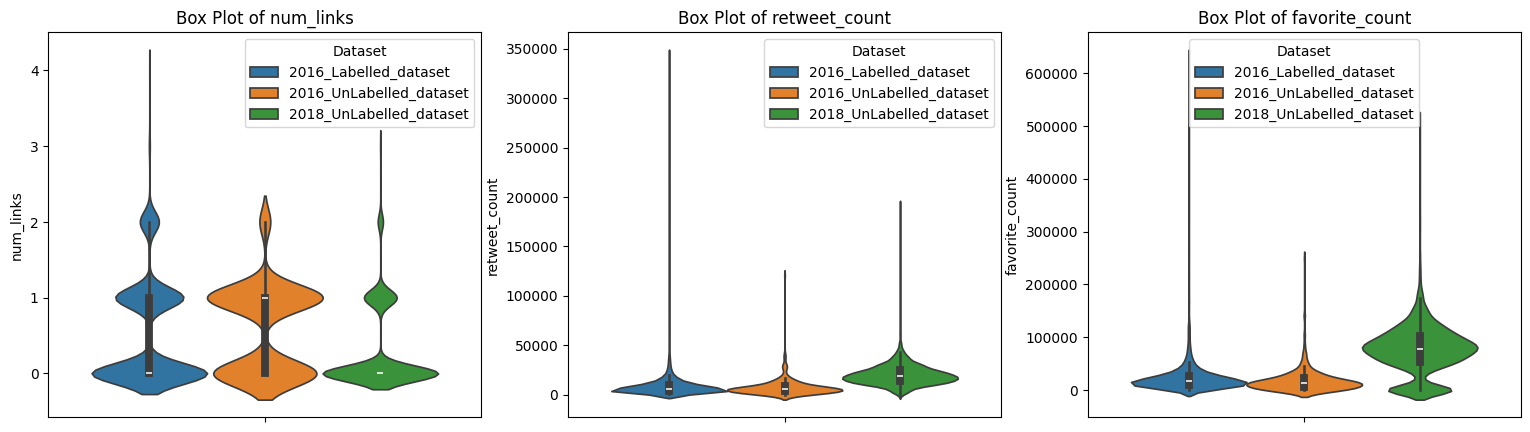

Conclusions:
* The classifier can be applied to the 2016 unlabelled dataset since the feature distributions closely match those of the training dataset.
* Applying the classifier to the 2018 dataset is not advisable due to significant differences in feature distributions, which could lead to inaccurate results.
* Therefore, the classifier is dependable for the 2016 dataset but is not reliable for the 2018 dataset.

# Improvements that can be made to the model
* Can use better context embedding like glove vector or BERT which have more contextual representation.
* More Feature Enginnering and creating new features like @mention and number of mentions 
* Can use complex neural network to understand more non linear representation over the other tree based or traditional classifier
